# Part III - (Presentation ProsperLoanData)
## by SOBJIO Ludane Lagnol


## Investigation Overview

> Pour la présentation, je me concentre sur les caractéristiques qui pourraient affecter le TAEG de l'emprunteur, à savoir le montant initial du prêt et la notation Prosper.
 J'ai commencé par montrer la distribution du TAEG de l'emprunteur et la variable du montant du prêt. Ensuite, j'ai montré la relation entre le TAEG et le montant du prêt, 
ainsi que le TAEG et la notation. J'ai également étudié l'effet de la notation sur la relation entre le TAEG et le montant du prêt, ainsi que l'effet de la notation sur la 
relation entre le TAEG de l'emprunteur et la durée du prêt.


## Dataset Overview

> Dans ce projet, nous allons explorer les données des prêts Prosper qui contiennent des informations sur 113937 prêts effectués par Prosper entre 2005 et 2014. Pour les besoins de 
ce projet, nous imaginerons que nous sommes un concurrent de Prosper et nous tenterons d'utiliser ces données pour prédire le taux d'intérêt qu'un emprunteur potentiel se verrait
 proposer par Prosper afin de pouvoir offrir un taux légèrement moins cher.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
# Selecting 17 features for visualization.
new_df = df[['LoanKey','Term','LoanStatus','BorrowerAPR','BorrowerRate','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','LoanOriginalAmount','CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome','MonthlyLoanPayment',
       'IncomeVerifiable']]

### Exploration univariée
Dans cette section, étudiez les distributions de variables individuelles. Si nous voyons des points inhabituels ou des valeurs aberrantes, nous allons les examiner de plus près pour nettoyer les choses et préparez-vous à examiner les relations entre les variables.

### Nous allons commencer pas regarder la durée des  prêts

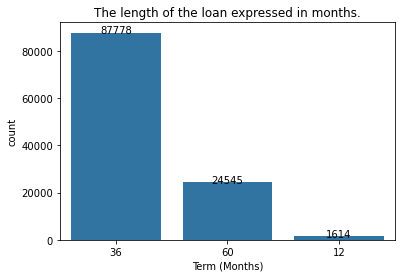

In [3]:
base_color = sns.color_palette()[0]
sns.countplot(x='Term',data=new_df,color=base_color,order=new_df['Term'].value_counts().index)
plt.xlabel('Term (Months)')

# Adding counts of each term in our data on top of of each bar.
for i in range (new_df['Term'].value_counts().shape[0]):
    count = new_df['Term'].value_counts().values[i]
    plt.text(i, count+3000, count, ha = 'center', va='top')
plt.title('The length of the loan expressed in months.');

### 

> Ainsi, à partir de l’intrigue ci-dessus, nous pouvons dire que la durée du prêt (en mois) est maximale de 36 mois et minimale de 12 mois. Nous essaierons de savoir pourquoi la durée du prêt est minimale pour 12 mois et maximale pour 36 mois plus tard.

### Regardons la variable « Catégorie d’inscription » 

In [4]:
# Category names for each numerical value.
list_cat={0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',
 7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',
 13:'Household Expenses',14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}

In [5]:
# Running a loop over dataset and dictionary created.
#Appending dictionary values to a list based on keys which are equal to the values present in our listing category.
l=[]
for i in range(new_df.shape[0]):
    for j in range(len(list_cat)):
        if new_df['ListingCategory (numeric)'].values[i] == list(list_cat.keys())[j]:
            l.append(list(list_cat.values())[j])

In [6]:
# Assigning a new column with listing labels.
new_df['ListingLabels'] = l

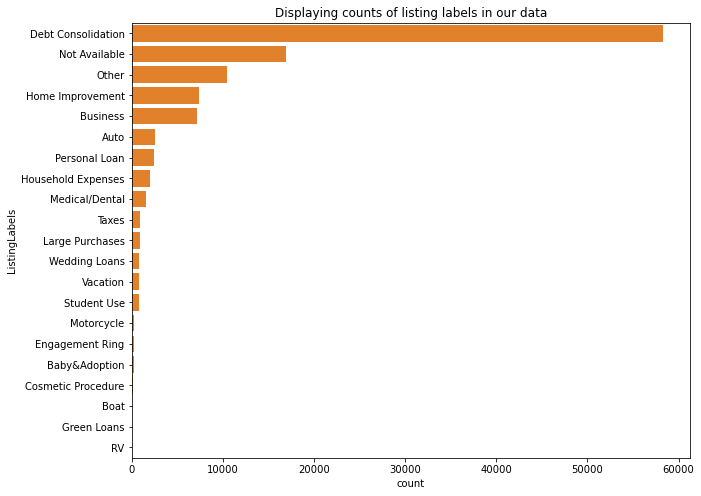

In [7]:
# Plotting countplot.
base_color2 = sns.color_palette()[1]
plt.figure(figsize=(10,8))
sns.countplot(y='ListingLabels',data=new_df,order=new_df['ListingLabels'].value_counts().index,color=base_color2)
plt.title('Displaying counts of listing labels in our data');

### 
La consolidation de dettes a le nombre maximal de comptes dans notre ensemble de données. Cela signifie que le maximum de prêts est pris pour la catégorie consolidation de dettes. Cela pourrait signifier que de nombreux emprunteurs ont déjà des dettes existantes, c’est pourquoi ils ont contracté un prêt de consolidation de dettes afin de réduire le fardeau des dettes existantes et de payer un certain montant pour un nouveau prêt chaque mois à faible taux d’intérêt.

##  Regardons maintenant la Distribution du revenu mensuel déclaré  'StatedMonthlyIncome' (A échelle logarithmique)

In [8]:
# Functioon to calculate cuberoot.
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3
# Function to calculate log.
def log_trans(z,inverse=False):

    if not inverse:

        return np.log10(z)
    else:
        return z**3

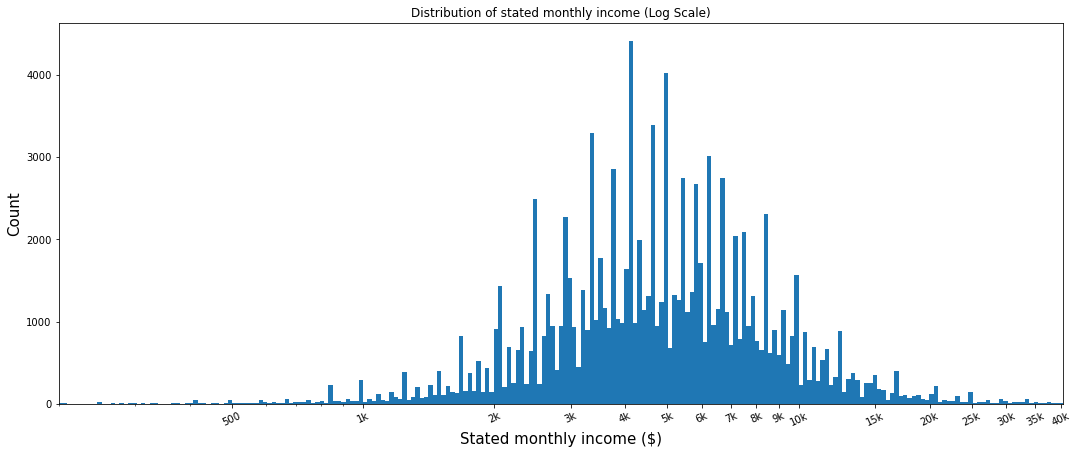

In [9]:
# Select outliers in debt to income ratio with ratio greater than 1.
outliers_dti = (new_df['DebtToIncomeRatio']>1)
out_df = new_df.loc[outliers_dti,:]
filter_df = new_df.loc[-outliers_dti,:]


# Plotting histogram by scaling the x-axis to log-type, and changing the axis limit.
plt.figure(figsize=[18,7])
bins = 10**np.arange(-1.07,4.6+0.1,0.01)
ticks = [0,5e2,1e3,2e3,3e3,4e3,5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]
labels = ['{}'.format(v)for v in ticks]
plt.hist(x='StatedMonthlyIncome',data=filter_df,bins=bins)
plt.xscale('log')
plt.xticks(10**(log_trans(np.array([0.001,100,500,1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]))),['0','100','500','1k','2k','3k','4k','5k','6k','7k','8k','9k','10k','15k','20k','25k','30k','35k','40k'],rotation=25);
plt.xlim(10**(log_trans(200)),10**(log_trans(40500)))
plt.xlabel('Stated monthly income ($)',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15})
plt.title('Distribution of stated monthly income (Log Scale)');

### 
Les revenues sont concentré entre 2.5k et 15k par mois.

###  Exploration bivariée

> Dans cette section, nous allons étudier les relations entre les paires de variables de vos données. Et nous Assurer que les variables que nous couvrons ici ont été introduites d’une manière ou d’une autre dans la section précédente (exploration univariée).

### Jetons un coup d’œil à la variable 'Borrower APR' and 'Borrower Rate' variable.

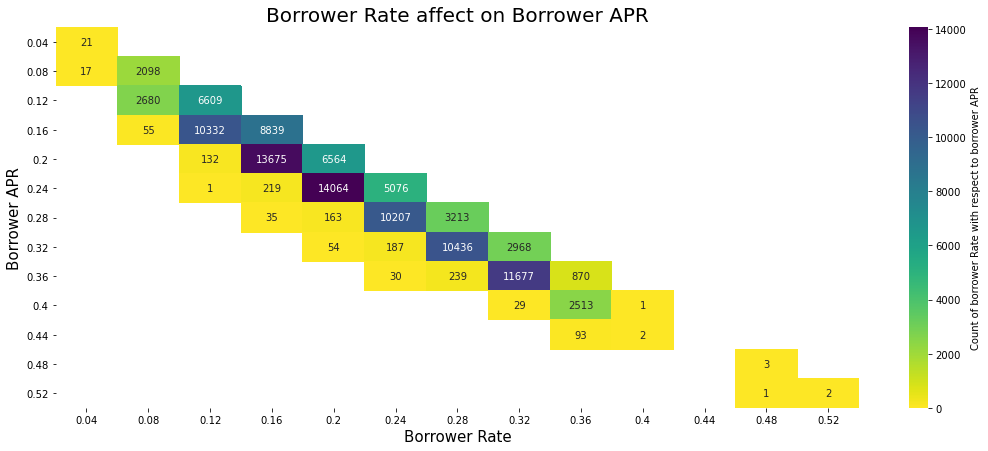

In [10]:
loan_df = filter_df.reset_index()
# Dropping index.
loan_df=loan_df.drop('index',axis=1)

for lab in ['BorrowerAPR','BorrowerRate']:
    bins = np.arange(0,loan_df[lab].max()+0.04,0.04)
    bins = [round(x,2) for x in bins]
    loan_df[f'{lab} cat'] = pd.cut(x=loan_df[lab],bins=bins,labels=bins[1:],include_lowest=False)
    
    
plt.figure(figsize=(18, 7))
sns.heatmap(loan_df.groupby(['BorrowerAPR cat','BorrowerRate cat']).size().unstack('BorrowerRate cat').replace({0:np.nan}),annot=True,
           fmt='.0f',cmap='viridis_r',vmin=0,cbar_kws={'label':'Count of borrower Rate with respect to borrower APR'})
plt.title('Borrower Rate affect on Borrower APR',fontdict={'size':20})
plt.xlabel('Borrower Rate',fontdict={'size':15})
plt.ylabel('Borrower APR',fontdict={'size':15})
plt.yticks(rotation=0)
plt.show();

>De la carte thermique ci-dessus, j’ai fait plusieurs observations:

Le taux de l’emprunteur est très proportionnel au TAEG de l’emprunteur. Cela signifie que si nous augmentons le TAEG de l’emprunteur, le taux de l’emprunteur augmentera également et vice versa. Les emprunteurs maximum ont un TAEG et un taux compris entre 0,1 et 0,2. (voir partie sombre) Entre 0,05 et 0,2, le nombre de TAEG de l’emprunteur et les augmentations de taux de l’emprunteur. Entre 0,2 et 0,35 le TAEG de l’emprunteur et les baisses de taux.

###  Explorons les variables 'Borrower APR' et 'Investors' .

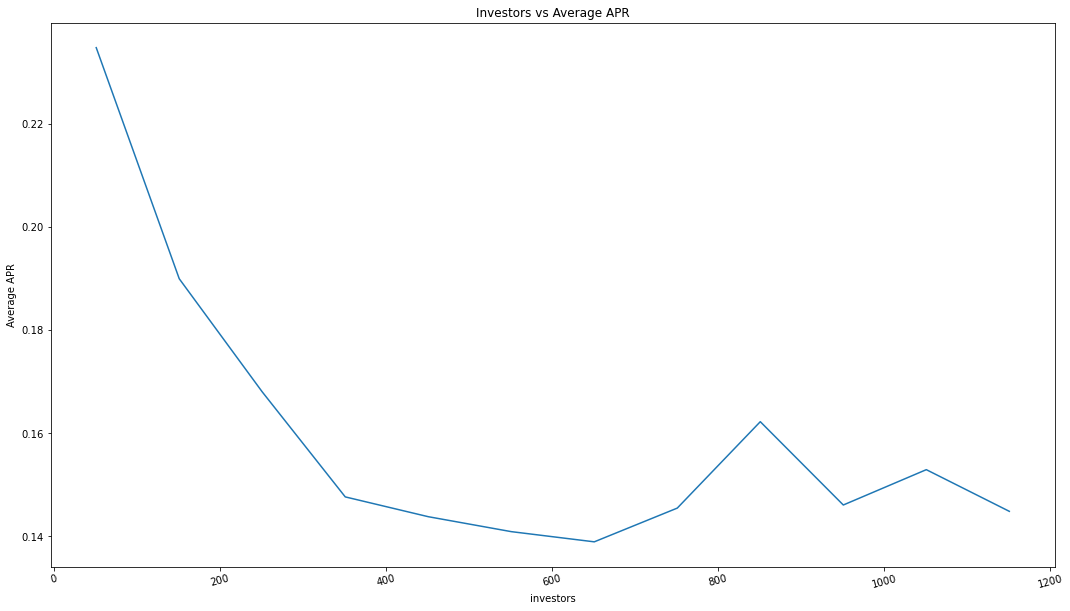

In [11]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bins_edges = np.arange(1,1189+100,100)
bins_center = bins_edges[:-1]+50
# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(loan_df['Investors'], bins_edges, include_lowest = True)
displ_binned

plt.figure(figsize=[18,10])
comb_mean = loan_df['BorrowerAPR'].groupby(displ_binned).mean()
comb_std = loan_df['DebtToIncomeRatio'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bins_center, y=comb_mean)
plt.xticks(rotation=15);
plt.xlabel('investors')
plt.ylabel('Average APR')
plt.title('Investors vs Average APR');


     il semble exister une corrélation négative modérée qui indique que si les deux variables Investisseurs et TAEG ont tendance à baisser en réponse l’une à l’autre, la relation est modérément forte.
     
 ### THANK

In [12]:
!jupyter nbconvert Part_II_slide_ProsperLoanData.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook Part_II_slide_ProsperLoanData.ipynb to slides
[NbConvertApp] Writing 593225 bytes to Part_II_slide_ProsperLoanData.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Anaconda3\lib\site-packages\nbconve